In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy.interpolate import interp1d
from math import sqrt
import os
import kmapper as km
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pickle
import folium
from haversine import haversine, Unit
from sklearn.preprocessing import StandardScaler



# **1.   Exploratory Data Analysis (EDA)**
## 1.1. Load data and understand it

In [2]:
dfs = []
for archivo in os.listdir("data_by_dates"):
    if archivo.endswith(".pkl"):
        print(f"Loading: {archivo}")
        df_partial = pd.read_pickle(os.path.join("data_by_dates", archivo))
        dfs.append(df_partial)

df = pd.concat(dfs, ignore_index=True)

# df = pd.read_pickle(os.path.join("data_by_dates", "block_01.pkl"))

# Graph configutation
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

Loading: block_01.pkl
Loading: block_02.pkl
Loading: block_03.pkl
Loading: block_04.pkl
Loading: block_05.pkl
Loading: block_06.pkl
Loading: block_07.pkl
Loading: block_08.pkl
Loading: block_09.pkl
Loading: block_10.pkl
Loading: block_11.pkl
Loading: block_12.pkl
Loading: block_13.pkl
Loading: block_14.pkl
Loading: block_15.pkl
Loading: block_16.pkl
Loading: block_17.pkl
Loading: block_18.pkl
Loading: block_19.pkl
Loading: block_20.pkl
Loading: block_21.pkl
Loading: block_22.pkl


In [3]:
print("DataFrame dimensions:")
print(df.shape)

print("\nColumns:")
print(df.columns.tolist())

print("\nData types :")
print(df.dtypes)

print("\nData:")
display(df.head())

print("Statistical Summary")
# display(df.describe())

print("\nNulos por columna:")
print(df.isnull().sum())


DataFrame dimensions:
(1098335, 6)

Columns:
['flight_id', 'date', 'dep_airport', 'arr_airport', 'plan_route', 'real_route']

Data types :
flight_id              object
date           datetime64[ns]
dep_airport            object
arr_airport            object
plan_route             object
real_route             object
dtype: object

Data:


,flight_id,date,dep_airport,arr_airport,plan_route,real_route
0,AFL2605AA73604012,2018-03-25,LEMD,None,"[(40.47222222222222, -3.560833333333333, 0.0, ...","[(40.47222222222222, -3.560833333333333, 0.0, ..."
1,AFL2529AA73604073,2018-03-25,LEMG,None,"[(36.675, -4.4991666666666665, 0.0, 2018-03-24...","[(36.675, -4.4991666666666665, 0.0, 2018-03-24..."
2,AFL2513AA73605040,2018-03-25,LEBL,None,"[(41.29694444444444, 2.0783333333333336, 0.0, ...","[(41.29694444444444, 2.0783333333333336, 0.0, ..."
3,AFL2549AA73600581,2018-03-25,GCTS,None,"[(28.044444444444448, -16.572499999999998, 0.0...","[(28.044444444444448, -16.572499999999998, 0.0..."
4,NAX1715AA73579261,2018-03-25,GCLP,None,"[(27.931944444444447, -15.386666666666667, 0.0...","[(27.931944444444447, -15.386666666666667, 0.0..."


Statistical Summary

Nulos por columna:
flight_id           0
date                0
dep_airport    422495
arr_airport    422355
plan_route          0
real_route          0
dtype: int64


# Unique airpots and its frequency

In [4]:
print("Unique departure airports:", len(df["dep_airport"].unique()))
print(df["dep_airport"].value_counts().head(10))

print("\nUnique arrival airports:", len(df["arr_airport"].unique()))
print(df["arr_airport"].value_counts().head(10))

Unique departure airports: 46
dep_airport
LEMD    126361
LEBL    109769
LEPA     88658
LEMG     48083
GCLP     36276
LEAL     33518
LEIB     31882
LEVC     22247
GCXO     21433
GCTS     18566
Name: count, dtype: int64

Unique arrival airports: 46
arr_airport
LEMD    126354
LEBL    109914
LEPA     88808
LEMG     48016
GCLP     36263
LEAL     33546
LEIB     31901
LEVC     22212
GCXO     21436
GCTS     18501
Name: count, dtype: int64


# Routes Analysis

In [5]:

print("\nExample planned route:")
print(df.iloc[0]["plan_route"])


print("\nExample real route:")
print(df.iloc[0]["real_route"])





Example planned route:
[(40.47222222222222, -3.560833333333333, 0.0, datetime.datetime(2018, 3, 25, 0, 9)), (40.49805555555556, -3.557222222222222, 1.0668, datetime.datetime(2018, 3, 25, 0, 9, 38)), (40.61805555555556, -3.540833333333333, 2.7432, datetime.datetime(2018, 3, 25, 0, 11, 32)), (40.63527777777778, -3.538333333333333, 2.8956, datetime.datetime(2018, 3, 25, 0, 11, 43)), (40.66861111111111, -3.5347222222222223, 3.13944, datetime.datetime(2018, 3, 25, 0, 12)), (40.76277777777778, -3.4305555555555554, 4.1148, datetime.datetime(2018, 3, 25, 0, 13, 19)), (40.848888888888894, -3.2569444444444446, 5.1815999999999995, datetime.datetime(2018, 3, 25, 0, 14, 54)), (40.85388888888889, -3.2466666666666666, 5.212079999999999, datetime.datetime(2018, 3, 25, 0, 14, 57)), (40.94694444444444, -2.7694444444444444, 7.0104, datetime.datetime(2018, 3, 25, 0, 18, 32)), (40.98027777777778, -2.5991666666666666, 7.467599999999999, datetime.datetime(2018, 3, 25, 0, 19, 43)), (41.022777777777776, -2.37

Are the Time Zones taken into account?

Duration Example Planned Route:
4:20:17


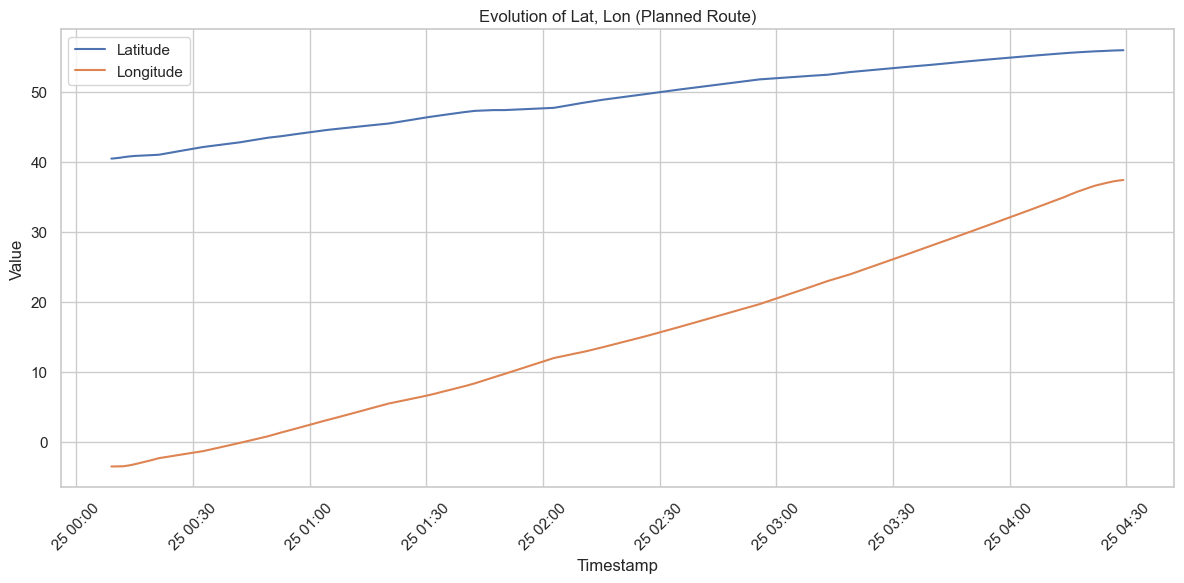

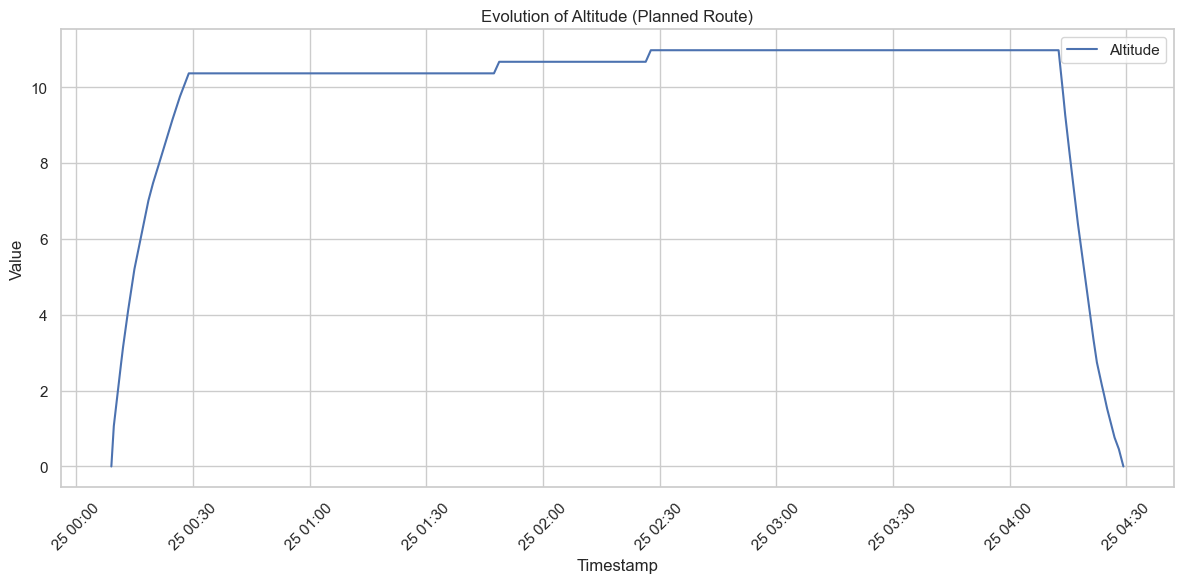

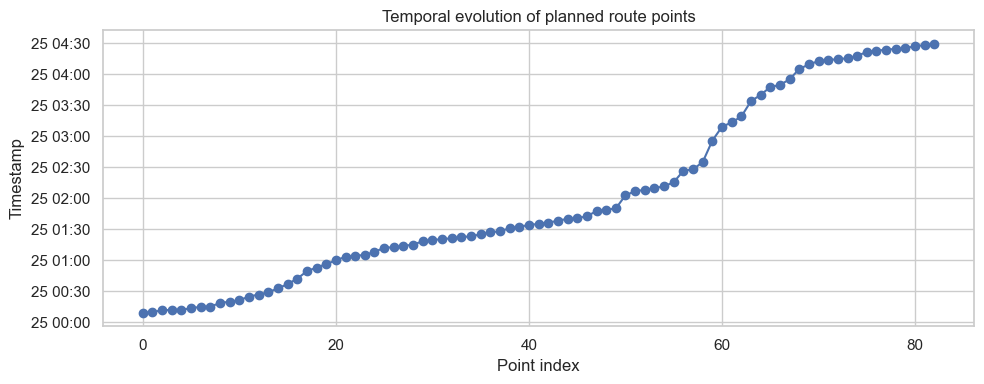

In [6]:
print("Duration Example Planned Route:")
print(df.iloc[0]["plan_route"][-1][3] - df.iloc[0]["plan_route"][0][3])


example_planned_route = df.iloc[0]["plan_route"]

lats_plan = [p[0] for p in example_planned_route]
lons_plan = [p[1] for p in example_planned_route]
alts_plan = [p[2] for p in example_planned_route]
times_plan = [p[3] for p in example_planned_route]

plt.figure(figsize=(12, 6))
plt.plot(times_plan, lats_plan, label="Latitude")
plt.plot(times_plan, lons_plan, label="Longitude")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Evolution of Lat, Lon (Planned Route)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(times_plan, alts_plan, label="Altitude")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Evolution of Altitude (Planned Route)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(range(len(times_plan)), times_plan, marker='o')
plt.xlabel("Point index")
plt.ylabel("Timestamp")
plt.title("Temporal evolution of planned route points")
plt.grid(True)
plt.tight_layout()
plt.show()

Duration Example Real Route:
4:21:03


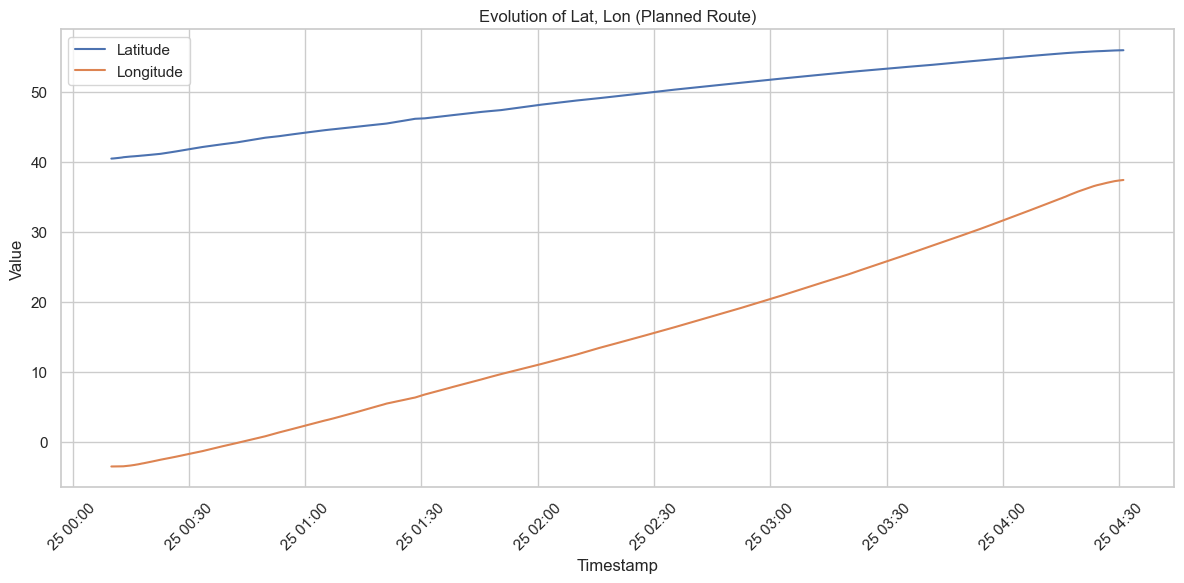

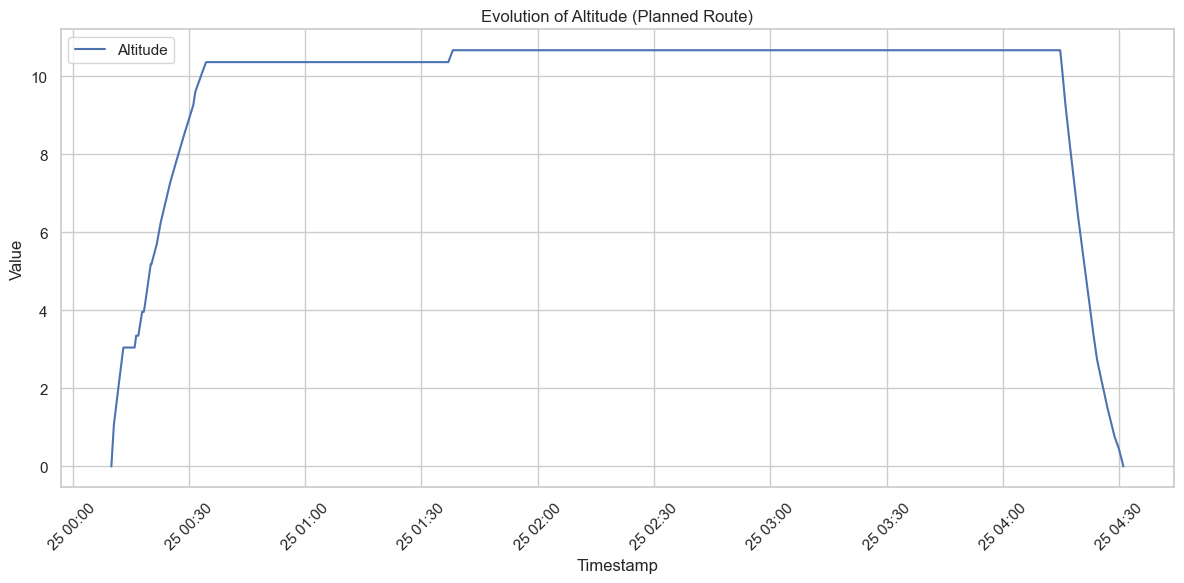

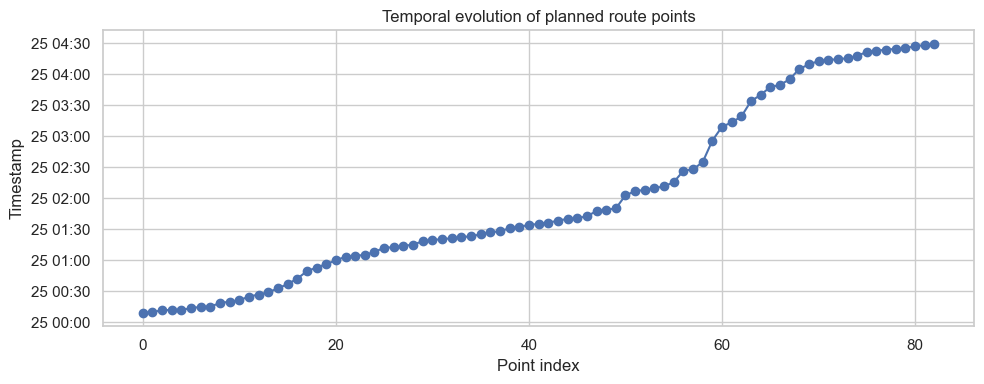

In [7]:
print("Duration Example Real Route:")
print(df.iloc[0]["real_route"][-1][3] - df.iloc[0]["real_route"][0][3])

example_real_route = df.iloc[0]["real_route"]

lats_real = [p[0] for p in example_real_route]
lons_real = [p[1] for p in example_real_route]
alts_real = [p[2] for p in example_real_route]
times_real = [p[3] for p in example_real_route]

plt.figure(figsize=(12, 6))
plt.plot(times_real, lats_real, label="Latitude")
plt.plot(times_real, lons_real, label="Longitude")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Evolution of Lat, Lon (Planned Route)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(times_real, alts_real, label="Altitude")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Evolution of Altitude (Planned Route)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(range(len(times_plan)), times_plan, marker='o')
plt.xlabel("Point index")
plt.ylabel("Timestamp")
plt.title("Temporal evolution of planned route points")
plt.grid(True)
plt.tight_layout()
plt.show()

How many flights with the same flight_id

In [8]:
print("Unique flight_id:", len(df["flight_id"].unique()))
print("Length df:", len(df))

Unique flight_id: 1098098
Length df: 1098335


In [9]:
# Longitud de las rutas (número de puntos por vuelo)
df["len_plan_route"] = df["plan_route"].apply(len)
df["len_real_route"] = df["real_route"].apply(len)

print("\nEstadísticas de longitud de rutas planificadas:")
print(df["len_plan_route"].describe())

print(f"\nNumero de rutas planificadas cuya ruta tenga menos de 5 puntos: ")
print(df[df["len_plan_route"] < 5].shape[0])
print(f"Numero de rutas planificadas cuya ruta tenga menos de 10 puntos: ")
print(df[df["len_plan_route"] < 10].shape[0])
print(f"Numero de rutas planificadas cuya ruta tenga menos de 25 puntos: ")
print(df[df["len_plan_route"] < 25].shape[0])

print("\nEstadísticas de longitud de rutas reales:")
print(df["len_real_route"].describe())

print(f"\nNumero de rutas reales cuya ruta tenga menos de 5 puntos: ")
print(df[df["len_real_route"] < 5].shape[0])
print(f"Numero de rutas reales cuya ruta tenga menos de 10 puntos: ")
print(df[df["len_real_route"] < 10].shape[0])
print(f"Numero de rutas reales cuya ruta tenga menos de 25 puntos: ")
print(df[df["len_real_route"] < 25].shape[0])


Estadísticas de longitud de rutas planificadas:
count    1.098335e+06
mean     5.313716e+01
std      1.744726e+01
min      2.000000e+00
25%      4.200000e+01
50%      5.500000e+01
75%      6.500000e+01
max      1.400000e+02
Name: len_plan_route, dtype: float64

Numero de rutas planificadas cuya ruta tenga menos de 5 puntos: 
4
Numero de rutas planificadas cuya ruta tenga menos de 10 puntos: 
170
Numero de rutas planificadas cuya ruta tenga menos de 25 puntos: 
78708

Estadísticas de longitud de rutas reales:
count    1.098335e+06
mean     8.486637e+01
std      2.396685e+01
min      5.000000e+00
25%      7.000000e+01
50%      8.800000e+01
75%      1.010000e+02
max      2.050000e+02
Name: len_real_route, dtype: float64

Numero de rutas reales cuya ruta tenga menos de 5 puntos: 
0
Numero de rutas reales cuya ruta tenga menos de 10 puntos: 
34
Numero de rutas reales cuya ruta tenga menos de 25 puntos: 
6178


In [10]:
# Example: first flight
def print_flight(flight):
    flight_id = flight["flight_id"]
    date = flight["date"]
    dep_airport = flight["dep_airport"]
    arr_airport = flight["arr_airport"]

    plan_route = flight["plan_route"]
    real_route = flight["real_route"]



    print(f"Flight Id: {flight_id}\n")
    print(f"Date: {date}\n")
    print(f"Departure: {dep_airport}\n")
    print(f"Arrival: {arr_airport}\n")

    print(f"Plan Route:") 
    for point in plan_route:
        print(point)
        
    print(f"\nReal Route:") 
    for point in real_route:
        print(point)
    
    
# df_short_route = df[df["real_route"].apply(len) <= 10]

# print(len(df_short_route))

# for index, row in df.iterrows():
#     if index < 3:
#         print_flight(row)

In [11]:
# Planned vs actual flight duration (in minutes)
def calc_duration(route):
    if len(route) < 2:
        return None
    t0 = route[0][3]
    t1 = route[-1][3]
    return (t1 - t0).total_seconds() / 60 

df["duration_plan"] = df["plan_route"].apply(calc_duration)
df["duration_real"] = df["real_route"].apply(calc_duration)

print("\nPlanned duration statistics:")
print(df["duration_plan"].describe())

print(f"\nNumber of planned routes with a duration of less than 1 minute: ")
print(df[df["duration_plan"] < 1].shape[0])
print(f"Number of planned routes with a duration of less than 5 minutes: ")
print(df[df["duration_plan"] < 5].shape[0])
print(f"Number of planned routes with a duration of less than 10 minutes: ")
print(df[df["duration_plan"] < 10].shape[0])

print("\nReal duration statistics:")
print(df["duration_real"].describe())

print(f"\nNumber of real routes with a duration of less than 1 minute: ")
print(df[df["duration_real"] < 1].shape[0])
print(f"Number of real routes with a duration of less than 5 minutes: ")
print(df[df["duration_real"] < 5].shape[0])
print(f"Number of real routes with a duration of less than 10 minutes: ")
print(df[df["duration_real"] < 10].shape[0])


Planned duration statistics:
count    1.098335e+06
mean     1.391694e+02
std      1.076397e+02
min      1.266667e+00
25%      7.770000e+01
50%      1.192167e+02
75%      1.566333e+02
max      1.415267e+03
Name: duration_plan, dtype: float64

Number of planned routes with a duration of less than 1 minute: 
0
Number of planned routes with a duration of less than 5 minutes: 
6
Number of planned routes with a duration of less than 10 minutes: 
81

Real duration statistics:
count    1.098335e+06
mean     1.382273e+02
std      1.075688e+02
min      2.750000e+00
25%      7.751667e+01
50%      1.181833e+02
75%      1.557333e+02
max      1.518067e+03
Name: duration_real, dtype: float64

Number of real routes with a duration of less than 1 minute: 
0
Number of real routes with a duration of less than 5 minutes: 
2
Number of real routes with a duration of less than 10 minutes: 
67


In [12]:
# df_short_time_route = df[df["plan_route"].apply(calc_duration) <= 10]

# print(len(df_short_time_route))

# print_flight(df_short_time_route.iloc[0])

In [13]:
# Difference in duration between routes
df["delay_minutes"] = df["duration_real"] - df["duration_plan"]
print("\nDelay statistics (real - plan):")
print(df["delay_minutes"].describe())


Delay statistics (real - plan):
count    1.098335e+06
mean    -9.421556e-01
std      7.283653e+00
min     -5.547667e+02
25%     -4.650000e+00
50%     -7.833333e-01
75%      2.766667e+00
max      1.441850e+03
Name: delay_minutes, dtype: float64


GRÁFICOS

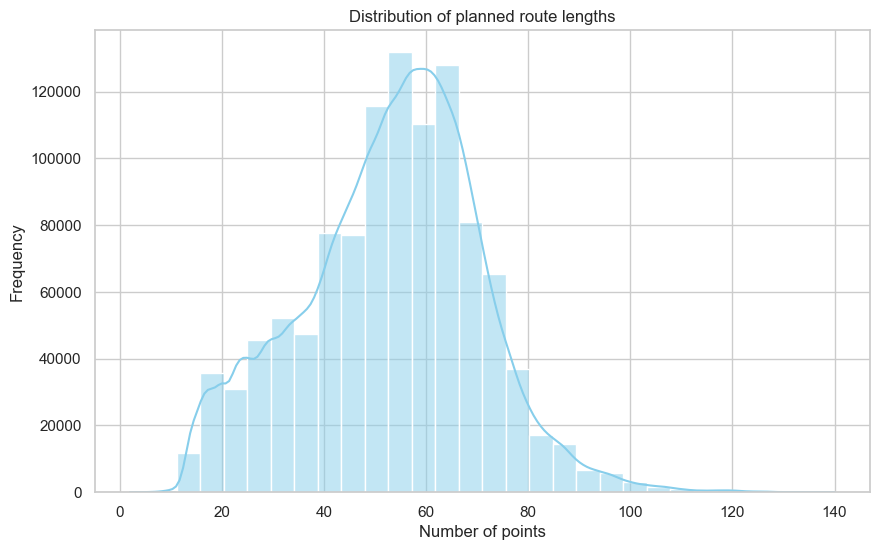

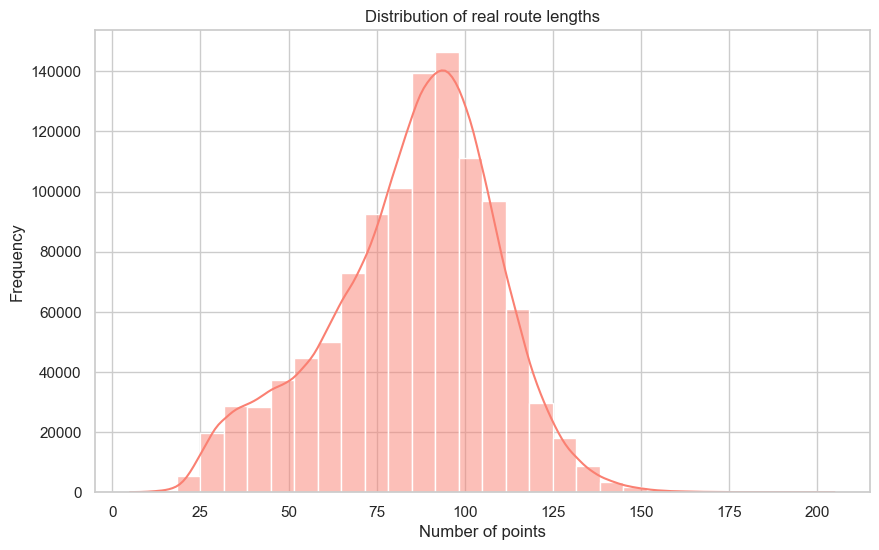

In [14]:
# Routes length
plt.figure()
sns.histplot(df["len_plan_route"], bins=30, color="skyblue", kde=True)
plt.title("Distribution of planned route lengths")
plt.xlabel("Number of points")
plt.ylabel("Frequency")
plt.show()

plt.figure()
sns.histplot(df["len_real_route"], bins=30, color="salmon", kde=True)
plt.title("Distribution of real route lengths")
plt.xlabel("Number of points")
plt.ylabel("Frequency")
plt.show()

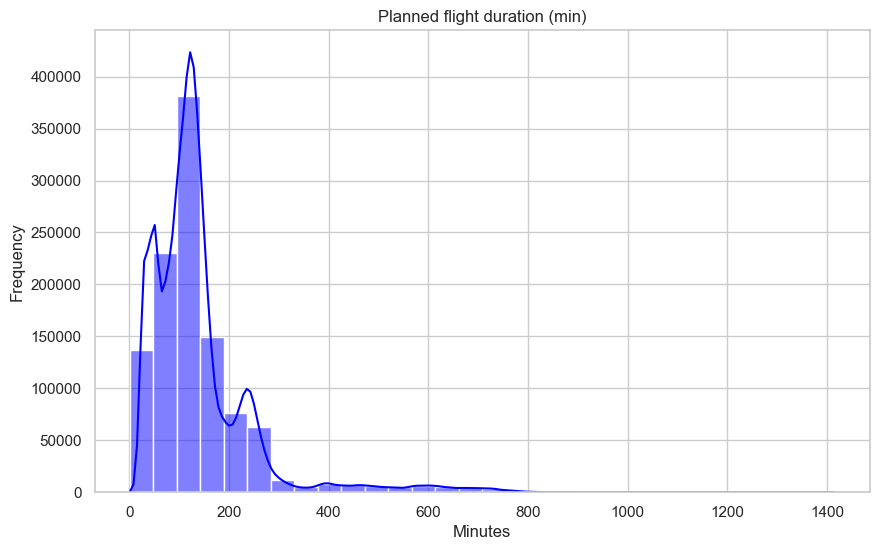

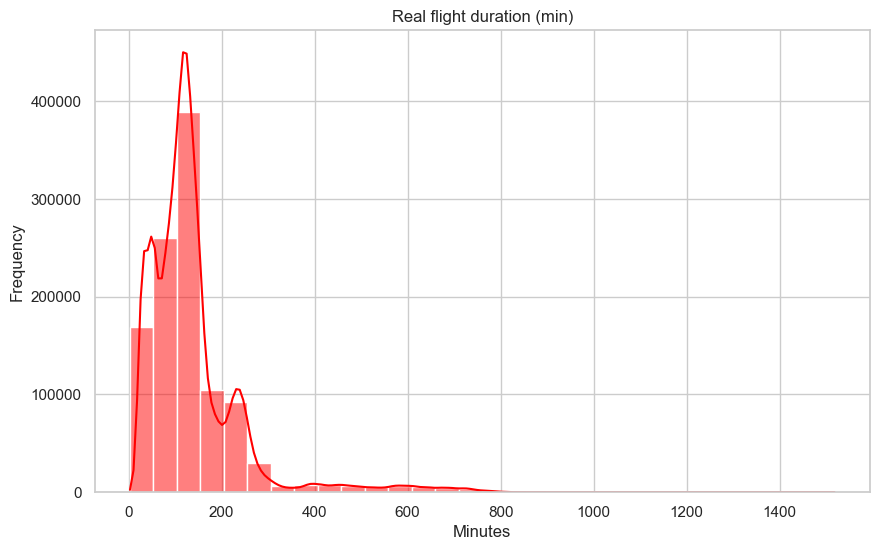

In [15]:
# Flight duration

plt.figure()
sns.histplot(df["duration_plan"], bins=30, color="blue", kde=True)
plt.title("Planned flight duration (min)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

plt.figure()
sns.histplot(df["duration_real"], bins=30, color="red", kde=True)
plt.title("Real flight duration (min)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()



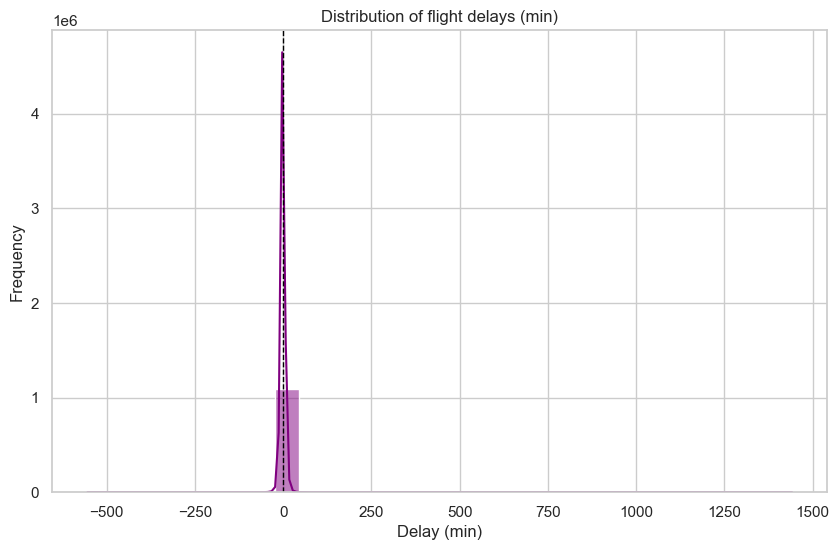

In [16]:
# Delays
plt.figure()
sns.histplot(df["delay_minutes"], bins=30, color="purple", kde=True)
plt.title("Distribution of flight delays (min)")
plt.xlabel("Delay (min)")
plt.ylabel("Frequency")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.show()

In [17]:
import numpy as np

problems_nan_inf = []
problems_short_routes = []
problems_strange_timestamp = []
problems_empty_routes = []

for idx, row in df.iterrows():
    plan_route = row["plan_route"]
    real_route = row["real_route"]
    
    # Check empty routes
    if not plan_route or not real_route:
        problems_empty_routes.append(idx)
        continue

    # Check too short routes
    if len(plan_route) < 2 or len(real_route) < 2:
        problems_short_routes.append(idx)
        continue

    # Check strange timestamps (diordered or nulls)
    try:
        plan_times = [p[3] for p in plan_route]
        real_times = [p[3] for p in real_route]

        # Check if timestamp is None
        if any(t is None for t in plan_times + real_times):
            problems_strange_timestamp.append(idx)
            continue
        
        # Check if they are ascendant (Chronologically ordered)
        if any(plan_times[i] > plan_times[i+1] for i in range(len(plan_times)-1)):
            problems_strange_timestamp.append(idx)
            continue
        
        # Check if they are not ascendant (Chronologically ordered)
        if any(real_times[i] > real_times[i+1] for i in range(len(real_times)-1)):
            problems_strange_timestamp.append(idx)
            continue

    except Exception as e:
        problems_strange_timestamp.append(idx)
        continue

    # Check for NaN or Inf values in latitudes and longitude
    lats_lons = [(p[0], p[1]) for p in plan_route + real_route]
    if any(not np.isfinite(lat) or not np.isfinite(lon) for lat, lon in lats_lons):
        problems_nan_inf.append(idx)
        continue

# Summary
print(f"Flights with  lat/lon NaN o inf: {len(problems_nan_inf)}")
print(f"Flights with too short routes (< 2): {len(problems_short_routes)}")
print(f"Flights with too strange timestamps: {len(problems_strange_timestamp)}")
print(f"Flights with empty timestamps: {len(problems_empty_routes)}")

# Show some examples
print("\nExamples of problematic flights:")
print(f"lat/lon nan/inf → {problems_nan_inf[:5]}")
print(f"short routes → {problems_short_routes[:5]}")
print(f"strange timestamps → {problems_strange_timestamp[:5]}")
print(f"empty routes → {problems_empty_routes[:5]}")


Flights with  lat/lon NaN o inf: 0
Flights with too short routes (< 2): 0
Flights with too strange timestamps: 0
Flights with empty timestamps: 0

Examples of problematic flights:
lat/lon nan/inf → []
short routes → []
strange timestamps → []
empty routes → []


In [18]:
def build_csvs(ruta_planificada, ruta_real, ruta_planificada_interp, ruta_real_interp):
    # Convertimos cada lista en un DataFrame
    df_planificada = pd.DataFrame(ruta_planificada, columns=['lat_planificada', 'lon_planificada', 'alt_planificada', 'datetime'])
    df_real = pd.DataFrame(ruta_real, columns=['lat_real', 'lon_real', 'alt_real', 'datetime'])
    df_planificada_interp = pd.DataFrame(ruta_planificada_interp, columns=['lat_planificada_interp', 'lon_planificada_interp', 'alt_planificada_interp', 'datetime'])
    df_real_interp = pd.DataFrame(ruta_real_interp, columns=['lat_real_interp', 'lon_real_interp', 'alt_real_interp', 'datetime'])

    # Convertimos 'datetime' a tipo datetime por si acaso
    for df in [df_planificada, df_real, df_planificada_interp, df_real_interp]:
        df['datetime'] = pd.to_datetime(df['datetime'])

    # Unimos todos los DataFrames por 'datetime'
    df_final = pd.merge(df_planificada_interp, df_real_interp, on='datetime', how='outer')
    df_final = pd.merge(df_final, df_planificada, on='datetime', how='left')
    df_final = pd.merge(df_final, df_real, on='datetime', how='left')

    # Ordenamos por fecha
    df_final = df_final.sort_values(by='datetime')

    # Guardamos a CSV
    df_final.to_csv('rutas_comparadas.csv', index=False)

# CALCULATE FEATURES

Plot Functions

In [19]:
def plot_both_routes_on_map(plan_route, real_route, interpolated_plan_route, interpolated_real_route, title="Planned route VS real route"):
    center_lat, center_lon, _, _ = plan_route[0]

    fmap = folium.Map(location=[center_lat, center_lon], zoom_start=6)

    plan_points = [(lat, lon) for lat, lon, _, _  in plan_route]
    real_points = [(lat, lon) for lat, lon, _, _  in real_route]
    
    interpolated_plan_points = [(lat, lon) for lat, lon, _, _  in interpolated_plan_route]
    interpolated_real_points = [(lat, lon) for lat, lon, _, _  in interpolated_real_route]
    
    
    # Print routes lines
    folium.PolyLine(plan_points, color="blue", weight=1, opacity=0.7, tooltip="Planned route").add_to(fmap)
    for lat, lon in plan_points:
            folium.CircleMarker(location=(lat, lon), radius=3, color="blue", fill=True, fill_opacity=0.6).add_to(fmap)
    folium.PolyLine(real_points, color="red", weight=1, opacity=0.7, tooltip="Real route").add_to(fmap)
    for lat, lon in real_points:
            folium.CircleMarker(location=(lat, lon), radius=3, color="red", fill=True, fill_opacity=0.6).add_to(fmap)
    
    folium.PolyLine(interpolated_plan_points, color="green", weight=1, opacity=0.7, tooltip="Planned interpolated route").add_to(fmap)
    for lat, lon in interpolated_plan_points:
            folium.CircleMarker(location=(lat, lon), radius=1, color="green", fill=True, fill_opacity=0.6).add_to(fmap)
    folium.PolyLine(interpolated_real_points, color="yellow", weight=1, opacity=0.7, tooltip="Real interpolated route").add_to(fmap)
    for lat, lon in interpolated_real_points:
            folium.CircleMarker(location=(lat, lon), radius=1, color="yellow", fill=True, fill_opacity=0.6).add_to(fmap)
    
    
    # Print Begining
    folium.Marker(plan_points[0], popup="Begining planned", icon=folium.Icon(color="blue")).add_to(fmap)
    folium.Marker(real_points[0], popup="Begining real", icon=folium.Icon(color="red")).add_to(fmap)
    folium.Marker(interpolated_plan_points[0], popup="Begining interpolated planned", icon=folium.Icon(color="green")).add_to(fmap)
    folium.Marker(interpolated_real_points[0], popup="Begining interpolated real", icon=folium.Icon(color="yellow")).add_to(fmap)

    # Print End
    folium.Marker(plan_points[-1], popup="End planned", icon=folium.Icon(color="blue", icon="flag")).add_to(fmap)
    folium.Marker(real_points[-1], popup="End real", icon=folium.Icon(color="red", icon="flag")).add_to(fmap)
    folium.Marker(interpolated_plan_points[-1], popup="End interpolated planned", icon=folium.Icon(color="green", icon="flag")).add_to(fmap)
    folium.Marker(interpolated_real_points[-1], popup="End interpolated real", icon=folium.Icon(color="yellow", icon="flag")).add_to(fmap)

    return fmap



def plot_first_routes(plan_route, real_route, interpolated_plan_route, interpolated_real_route, target_times):
    route_debug = {
        "plan_route": plan_route,
        "real_route": real_route,
        "interpolated_plan_route": interpolated_plan_route,
        "interpolated_real_route": interpolated_real_route
    }

    # Guardar como archivo pickle
    with open("debug_routes.pkl", "wb") as f:
        pickle.dump(route_debug, f)
    
    map = plot_both_routes_on_map(
        plan_route,
        real_route,
        interpolated_plan_route,
        interpolated_real_route,
        title="Comapre Interpolated Routes"
    )
    
    map.save("compared_interpolated_routes.html")
    
    alts_plan = [p[2] for p in plan_route]
    alts_real = [p[2] for p in real_route]
    times_plan = [p[3] for p in plan_route]
    times_real = [p[3] for p in real_route]
    
    
    alts_plan_interpolated = [p[2] for p in interpolated_plan_route]
    alts_real_interpolated = [p[2] for p in interpolated_real_route]
    
    
    plt.figure(figsize=(12, 6))
    plt.plot(times_plan, alts_plan, label="Plan Altitud")
    plt.plot(times_real, alts_real, label="Real Altitud")
    plt.xlabel("Timestamp")
    plt.ylabel("Value")
    plt.title("Evolution of Altitude Original Routes")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(target_times, alts_plan_interpolated, label="Interpolated Plan Altitud")
    plt.plot(target_times, alts_real_interpolated, label="Interpolated Real Altitud")
    plt.xlabel("Timestamp")
    plt.ylabel("Value")
    plt.title("Evolution of Altitude Interpolated Routes")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Calculate the deviation using the Haversine distance

In [20]:

        
def new_timestamps(x, y, datetime, origin):
    m = (y[1] - y[0]) / (x[1] - x[0])
    new_timestamp =  pd.to_datetime((m * (y[0] + (datetime - origin).total_seconds() - x[0] )), unit='s', origin=origin)
    return new_timestamp

def interpolate_route(route, target_times):
    if not route:
        return [(0.0, 0.0, 0.0, t) for t in target_times]
    
    if len(route) == 1:
        lat, lon, alt, _ = route[0]
        return [(lat, lon, alt, t) for t in target_times]
    
    t0 = route[0][3]
    times = np.array([(p[3] - t0).total_seconds() for p in route])
    lats = np.array([p[0] for p in route])
    lons = np.array([p[1] for p in route])
    alts = np.array([p[2] for p in route])
    
    target_seconds = np.array([(t - t0).total_seconds() for t in target_times])
    
    return list(zip(
        interp1d(times, lats, fill_value=(lats[0], lats[-1]), bounds_error=False)(target_seconds),
        interp1d(times, lons, fill_value=(lons[0], lons[-1]), bounds_error=False)(target_seconds),
        interp1d(times, alts, fill_value=(alts[0], alts[-1]), bounds_error=False)(target_seconds),
        target_times
    ))
    
    
def get_union_timestamps(route1, route2):
    return sorted(set(p[3] for p in route1 + route2))

def compute_3d_distance(p1, p2):
    d_horizontal = haversine((p1['lat'], p1['lon']), (p2['lat'], p2['lon']), unit=Unit.METERS)
    d_vertical = p2['alt'] - p1['alt']
    return np.hypot(d_horizontal, d_vertical)

def compute_progress(df):
    distances = [0]
    for i in range(1, len(df)):
        distances.append(distances[-1] + compute_3d_distance(df.iloc[i-1], df.iloc[i]))
    return np.array(distances) / distances[-1]

def synchronize_timestamps(planned_route, real_route, is_first=False):
    df_plan = pd.DataFrame(planned_route, columns=['lat', 'lon', 'alt', 'timestamp'])
    df_real = pd.DataFrame(real_route, columns=['lat', 'lon', 'alt', 'timestamp'])

    df_plan['s'] = compute_progress(df_plan)
    df_real['s'] = compute_progress(df_real)

    t0 = df_plan['timestamp'].iloc[0]
    df_plan['ts_sec'] = (df_plan['timestamp'] - t0).dt.total_seconds()
    
    df_real['ts_sec_sync'] = np.interp(df_real['s'], df_plan['s'], df_plan['ts_sec'])
    df_real['timestamp_sync'] = pd.to_datetime(df_real['ts_sec_sync'], unit='s', origin=t0)
    
    return df_real

def plot_graph(datax1, datay1, label1, datax2, datay2, label2, labelx, labely, title):
    plt.figure(figsize=(10, 5))
    plt.plot(datax1, datay1, label=label1, marker='o', linestyle='--')
    plt.plot(datax2, datay2, label=label2, marker='x')
    plt.title(title)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_routes(plan_route, real_route, real_synchronized_df_local, interp_plan, interp_real, target_times):
        origin = plan_route[0][3]
    
        y = [(plan_route[0][3] - origin).total_seconds(), (plan_route[-1][3]- origin).total_seconds()]
        x = [(real_route[0][3]- origin).total_seconds(), (real_route[-1][3]- origin).total_seconds()]
        
        
        real_synchronized_df_global = [(p[0],p[1],p[2], new_timestamps(x,y, p[3], origin)) for p in real_route ]
        
        n_plan_points = 15
        n_real_points = 30
        
        lats_plan = [p[0] for p in plan_route[:n_plan_points] ]
        lons_plan = [p[1] for p in plan_route[:n_plan_points] ]
        alts_plan = [p[2] for p in plan_route[:n_plan_points] ]
        dts_plan = [p[3] for p in plan_route[:n_plan_points] ]
        
        lats_real = [p[0] for p in real_route[:n_real_points] ]
        lons_real= [p[1] for p in real_route[:n_real_points] ]
        alts_real= [p[2] for p in real_route[:n_real_points] ]
        dts_real = [p[3] for p in real_route[:n_real_points] ]
        
        lats_real_syn_global = [p[0] for p in real_synchronized_df_global[:n_real_points] ]
        lons_real_syn_global = [p[1] for p in real_synchronized_df_global[:n_real_points] ]
        alts_real_syn_global = [p[2] for p in real_synchronized_df_global[:n_real_points] ]
        dts_real_syn_global = [p[3] for p in real_synchronized_df_global[:n_real_points] ]
        
        lats_real_syn_local = [p[0] for p in real_synchronized_df_local[:n_real_points] ]
        lons_real_syn_local = [p[1] for p in real_synchronized_df_local[:n_real_points] ]
        alts_real_syn_local = [p[2] for p in real_synchronized_df_local[:n_real_points] ]
        dts_real_syn_local = [p[3] for p in real_synchronized_df_local[:n_real_points] ]
        
        
        print("\nLATITUDES")
        
        plot_graph(dts_plan, lats_plan, "Plan Original", dts_real, lats_real, "Real Original", "Time", "Latitude", "Original Route Latitudes")
        plot_graph(dts_plan, lats_plan, "Plan Original", dts_real_syn_global, lats_real_syn_global, "Real Sync Lineal", "Time", "Latitude", "Sync Lineal Route Latitudes")
        plot_graph(dts_plan, lats_plan, "Plan Original", dts_real_syn_local, lats_real_syn_local, "Real Sync Progression", "Time", "Latitude", "Sync Progression Route Latitudes")
        
        print("\nLONGITUDES")
        
        plot_graph(dts_plan, lons_plan, "Plan Original", dts_real, lons_real, "Real Original", "Time", "Longitude", "Original Route Longitudes")
        plot_graph(dts_plan, lons_plan, "Plan Original", dts_real_syn_global, lons_real_syn_global, "Real Sync Lineal", "Time", "Longitude", "Sync Lineal Route Longitude")
        plot_graph(dts_plan, lons_plan, "Plan Original", dts_real_syn_local, lons_real_syn_local, "Real Sync Progression", "Time", "Longitude", "Sync Progression Route Longitudes")
        
        print("\nALTITUDES")
        
        plot_graph(dts_plan, alts_plan, "Plan Original", dts_real, alts_real, "Real Original", "Time", "Altitude", "Original Route Altitudes")
        plot_graph(dts_plan, alts_plan, "Plan Original", dts_real_syn_global, alts_real_syn_global, "Real Sync Lineal", "Time", "Altitude", "Sync Lineal Route Altitudes")
        plot_graph(dts_plan, alts_plan, "Plan Original", dts_real_syn_local, alts_real_syn_local, "Real Sync Progression", "Time", "Altitude", "Sync Progression Route Altitudes")
        
        print("\n\nINTERPOLATED ROUTES")
        plot_first_routes(plan_route, real_route, interp_plan, interp_real, target_times)

def calculate_deviation(plan_route, real_route, is_first= False):
    if len(plan_route) < 2 or len(real_route) < 2:
        return None

    real_synced_df = synchronize_timestamps(plan_route, real_route, is_first)
    real_synced = list(zip(
        real_synced_df['lat'], real_synced_df['lon'], real_synced_df['alt'], real_synced_df['timestamp_sync']
    ))

    target_times = get_union_timestamps(plan_route, real_synced)
    interp_plan = interpolate_route(plan_route, target_times)
    interp_real = interpolate_route(real_synced, target_times)

    distances = [
        sqrt(haversine((p1[0], p1[1]), (p2[0], p2[1]), unit=Unit.KILOMETERS) ** 2 + (p1[2] - p2[2]) ** 2)
        for p1, p2 in zip(interp_plan, interp_real)
    ]
    
    if is_first:
        plot_routes(plan_route, real_route, real_synced, interp_plan, interp_real, target_times)
        

    return sum(distances) if distances else None

def generate_departure_arrival_dfs(df):
    departures, arrivals = [], []

    for i, (_, row) in enumerate(df.iterrows()):
        if i % 1000 == 0:
            print(f"Processing row {i}...")

        plan, real = row["plan_route"], row["real_route"]
        deviation = calculate_deviation(plan, real)
        delay = (real[-1][3] - plan[-1][3]).total_seconds() / 60

        if row.get("dep_airport"):
            departures.append({"airportCode": row["dep_airport"], "date": row["date"], "deviation": deviation, "delay": delay})
        if row.get("arr_airport"):
            arrivals.append({"airportCode": row["arr_airport"], "date": row["date"], "deviation": deviation, "delay": delay})

    return pd.DataFrame(departures), pd.DataFrame(arrivals)




In [21]:
df_departures, df_arrivals = generate_departure_arrival_dfs(df)

Processing row 0...
Processing row 1000...
Processing row 2000...
Processing row 3000...
Processing row 4000...
Processing row 5000...
Processing row 6000...
Processing row 7000...
Processing row 8000...
Processing row 9000...
Processing row 10000...
Processing row 11000...
Processing row 12000...
Processing row 13000...
Processing row 14000...
Processing row 15000...
Processing row 16000...
Processing row 17000...
Processing row 18000...
Processing row 19000...
Processing row 20000...
Processing row 21000...
Processing row 22000...
Processing row 23000...
Processing row 24000...
Processing row 25000...
Processing row 26000...
Processing row 27000...
Processing row 28000...
Processing row 29000...
Processing row 30000...
Processing row 31000...
Processing row 32000...
Processing row 33000...
Processing row 34000...
Processing row 35000...
Processing row 36000...
Processing row 37000...
Processing row 38000...
Processing row 39000...
Processing row 40000...
Processing row 41000...
Proce

5.783333333333333

LATITUDES


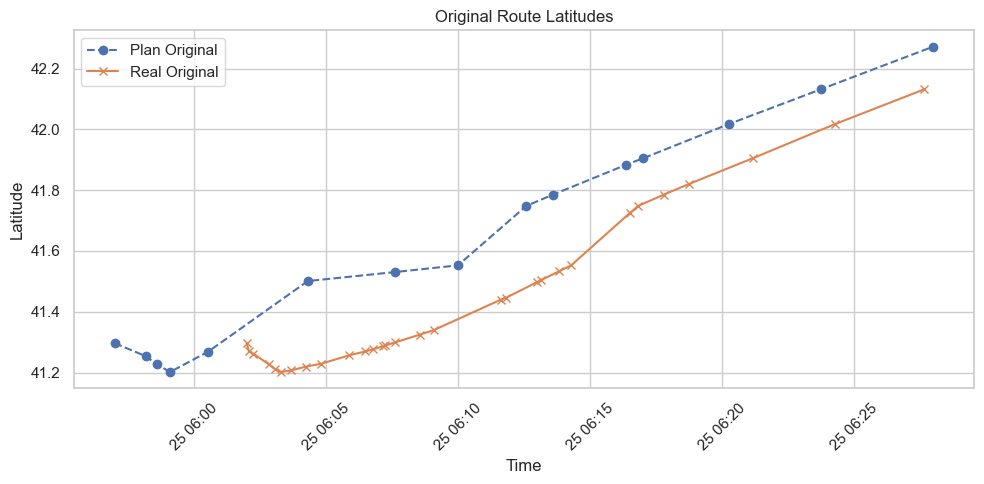

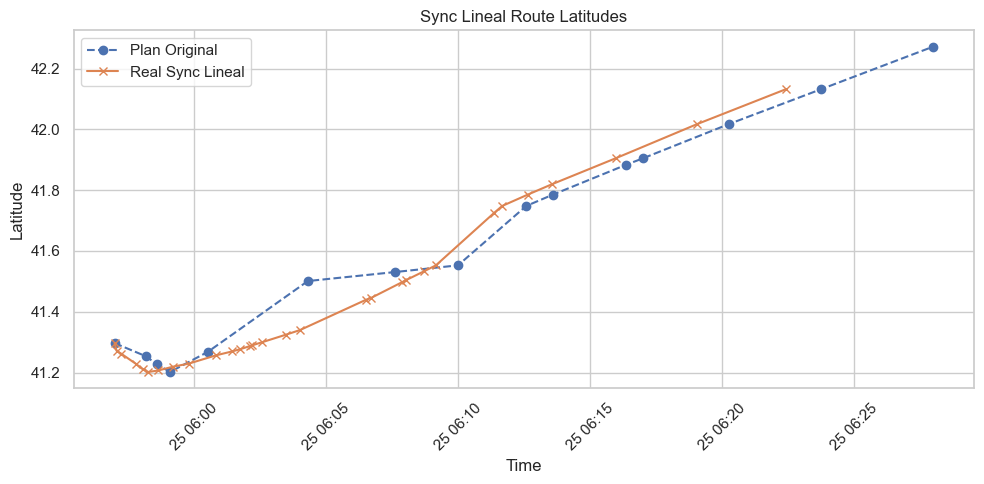

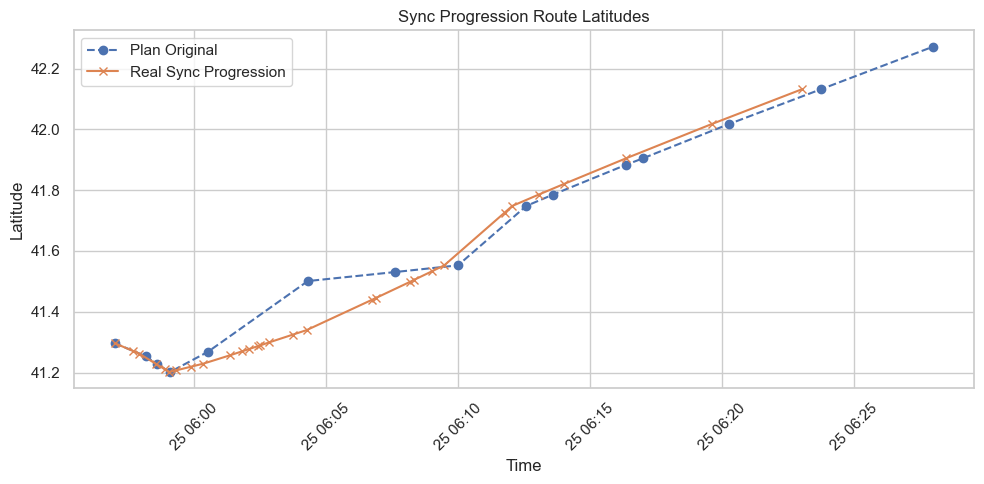


LONGITUDES


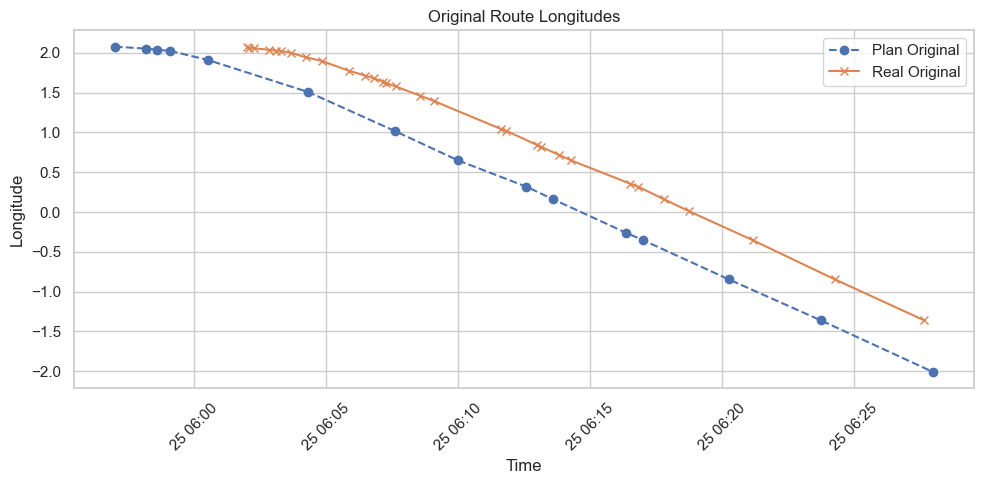

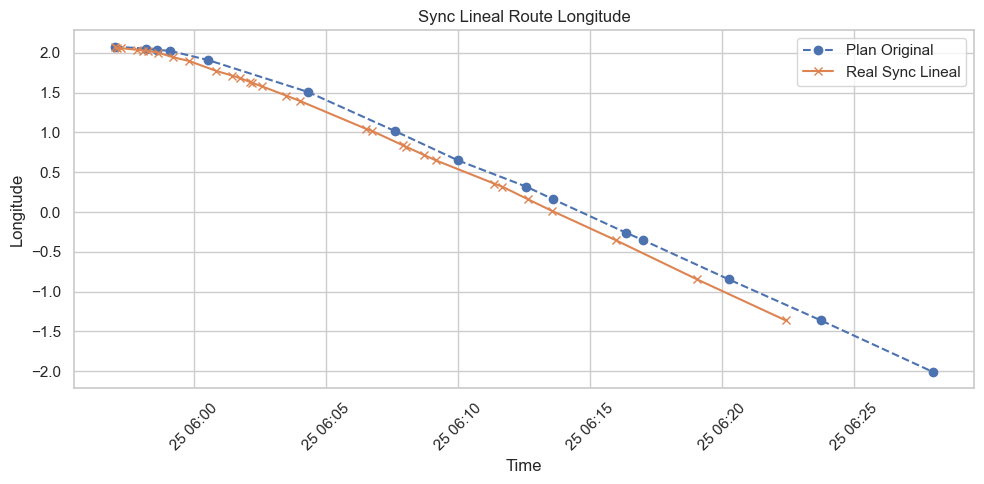

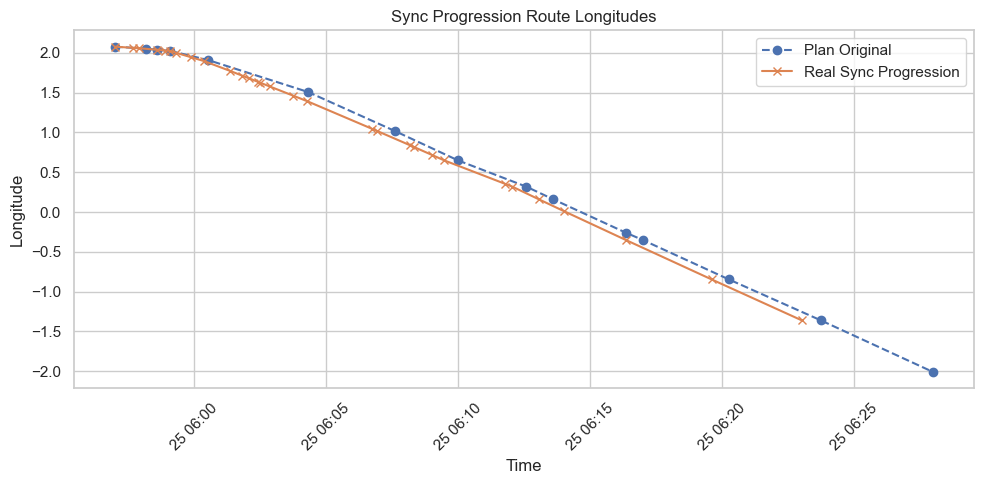


ALTITUDES


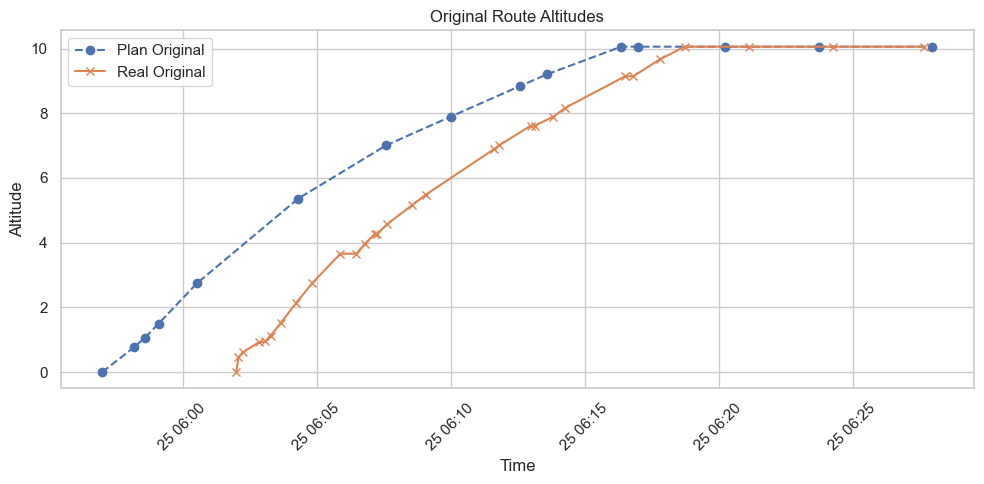

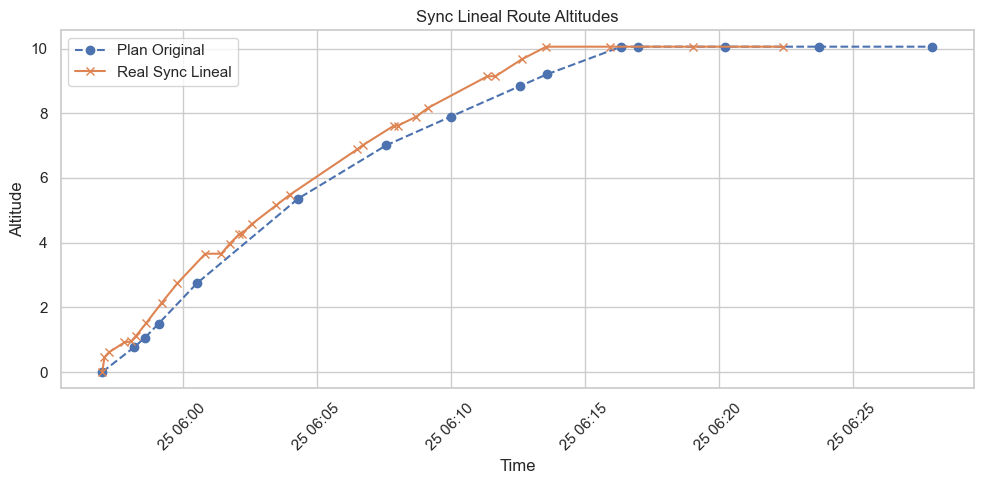

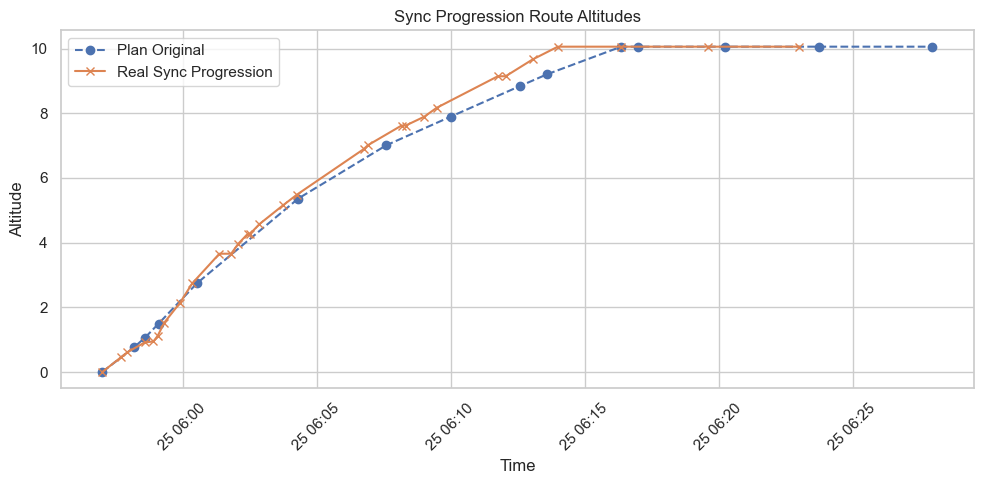



INTERPOLATED ROUTES


C:\Users\Raúl\AppData\Local\Temp\ipykernel_7620\1027857904.py:33: UserWarning: color argument of Icon should be one of: {'blue', 'green', 'lightgreen', 'lightgray', 'beige', 'darkblue', 'purple', 'lightblue', 'white', 'darkpurple', 'orange', 'gray', 'black', 'darkred', 'lightred', 'cadetblue', 'pink', 'red', 'darkgreen'}.
  folium.Marker(interpolated_real_points[0], popup="Begining interpolated real", icon=folium.Icon(color="yellow")).add_to(fmap)
C:\Users\Raúl\AppData\Local\Temp\ipykernel_7620\1027857904.py:39: UserWarning: color argument of Icon should be one of: {'blue', 'green', 'lightgreen', 'lightgray', 'beige', 'darkblue', 'purple', 'lightblue', 'white', 'darkpurple', 'orange', 'gray', 'black', 'darkred', 'lightred', 'cadetblue', 'pink', 'red', 'darkgreen'}.
  folium.Marker(interpolated_real_points[-1], popup="End interpolated real", icon=folium.Icon(color="yellow", icon="flag")).add_to(fmap)


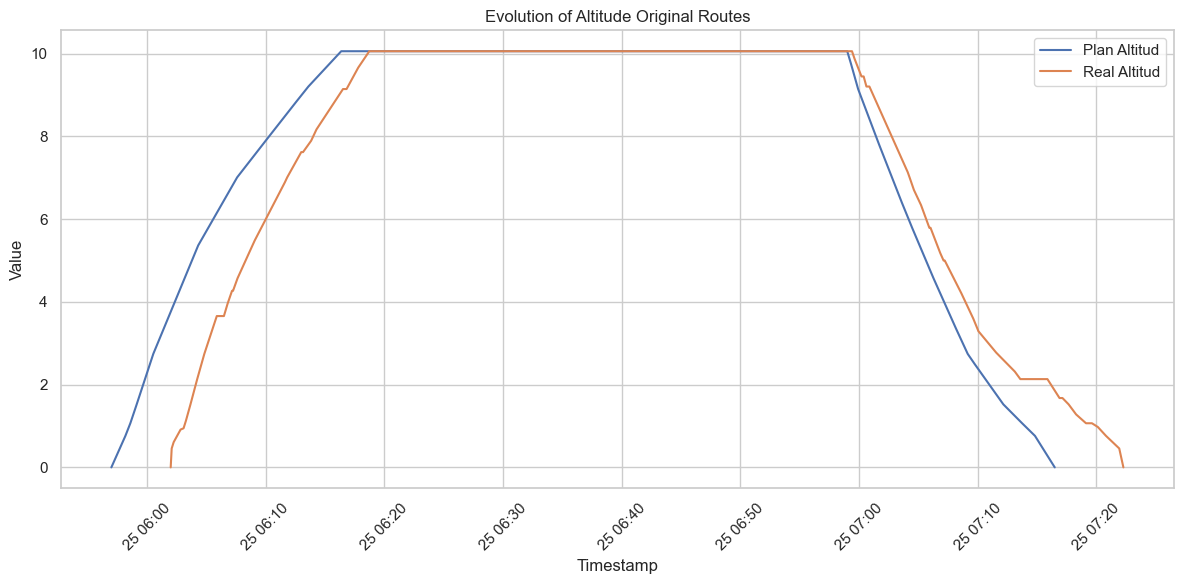

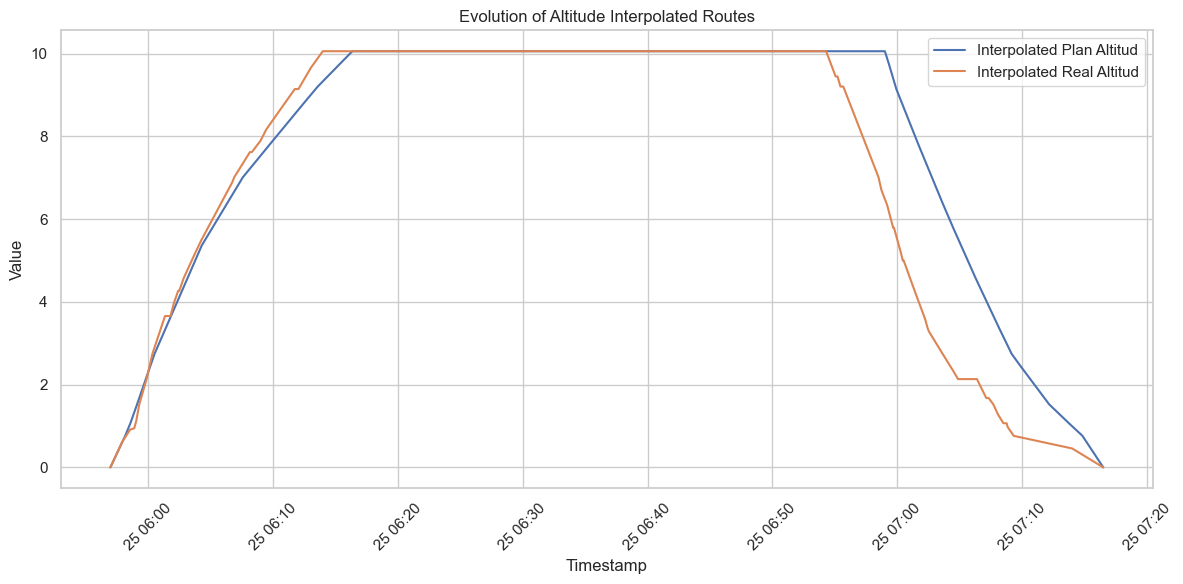

1124.2603837223835

In [22]:
# TEST TO SEE INTERPOLATED ROUTES


plan = df.iloc[1000]["plan_route"]
real = df.iloc[1000]["real_route"]
print((real[-1][3] - plan[-1][3]).total_seconds() / 60)
calculate_deviation(plan, real, True)

In [23]:
print(df_departures.head())

print(df_departures.columns.tolist())

print(df_arrivals.head())

print(df_arrivals.columns.tolist())

  airportCode       date    deviation      delay
0        LEMD 2018-03-25  1739.571241   1.766667
1        LEMG 2018-03-25  1400.381479  -1.250000
2        LEBL 2018-03-25   523.231857   7.900000
3        GCTS 2018-03-25  1742.798301   6.950000
4        GCLP 2018-03-25  5873.517192  16.700000
['airportCode', 'date', 'deviation', 'delay']
  airportCode       date    deviation     delay
0        LEMG 2018-03-25  2163.547648 -5.483333
1        LEMD 2018-03-25  3898.538882  2.533333
2        GCTS 2018-03-25     0.000000  0.000000
3        LEMD 2018-03-25   684.553942  3.316667
4        GCLP 2018-03-25   589.192847 -5.016667
['airportCode', 'date', 'deviation', 'delay']


<Figure size 1200x600 with 0 Axes>

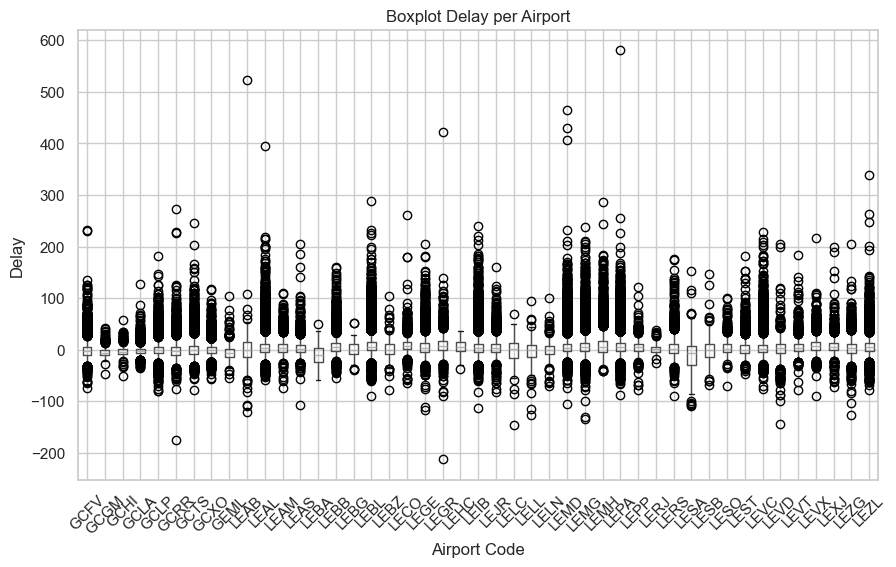

<Figure size 1200x600 with 0 Axes>

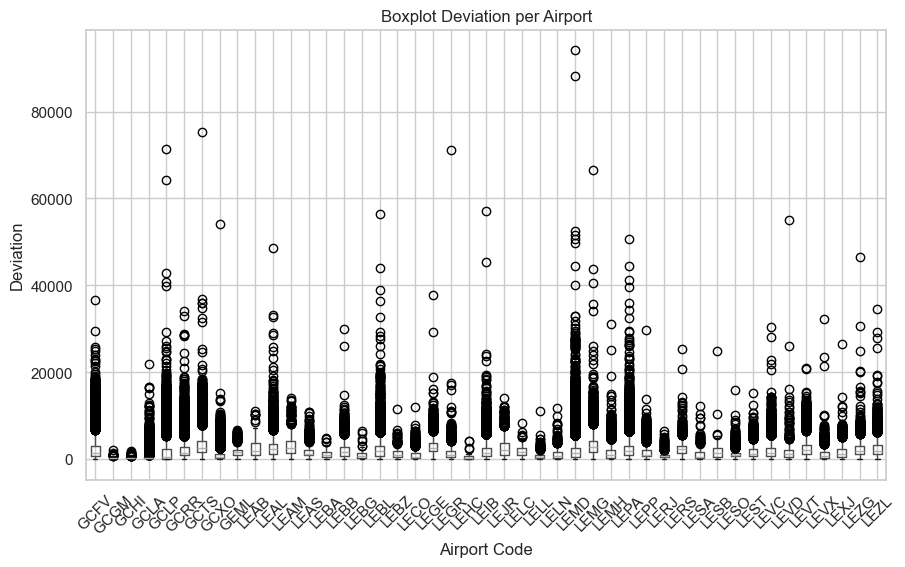

<Figure size 1200x600 with 0 Axes>

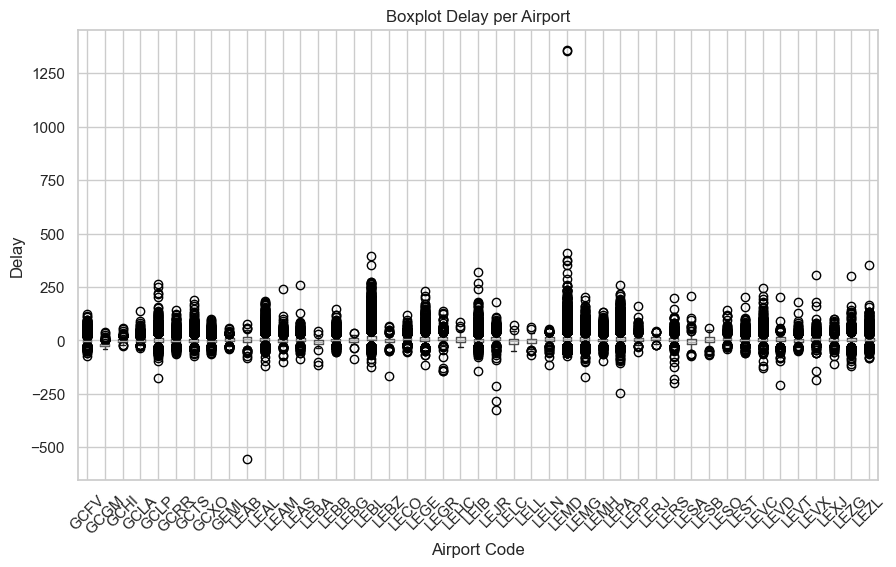

<Figure size 1200x600 with 0 Axes>

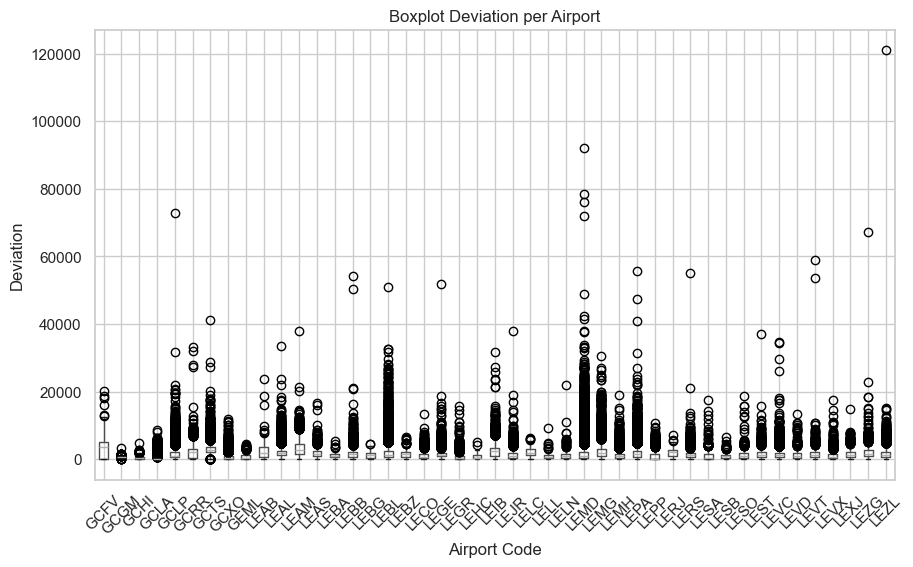

In [24]:
def print_boxplot(df):
    plt.figure(figsize=(12, 6))
    df.boxplot(column='delay', by='airportCode')
    plt.title('Boxplot Delay per Airport')
    plt.suptitle('')
    plt.xlabel('Airport Code')
    plt.ylabel('Delay')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Boxplot para DESVIATION por airportCode
    plt.figure(figsize=(12, 6))
    df.boxplot(column='deviation', by='airportCode')
    plt.title('Boxplot Deviation per Airport')
    plt.suptitle('')
    plt.xlabel('Airport Code')
    plt.ylabel('Deviation')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
  
print_boxplot(df_departures)  
print_boxplot(df_arrivals)  


In [27]:
df_departures.to_pickle("calculated_distances_dep.pkl")

df_arrivals.to_pickle("calculated_distances_arr.pkl")

<Figure size 2000x1000 with 0 Axes>

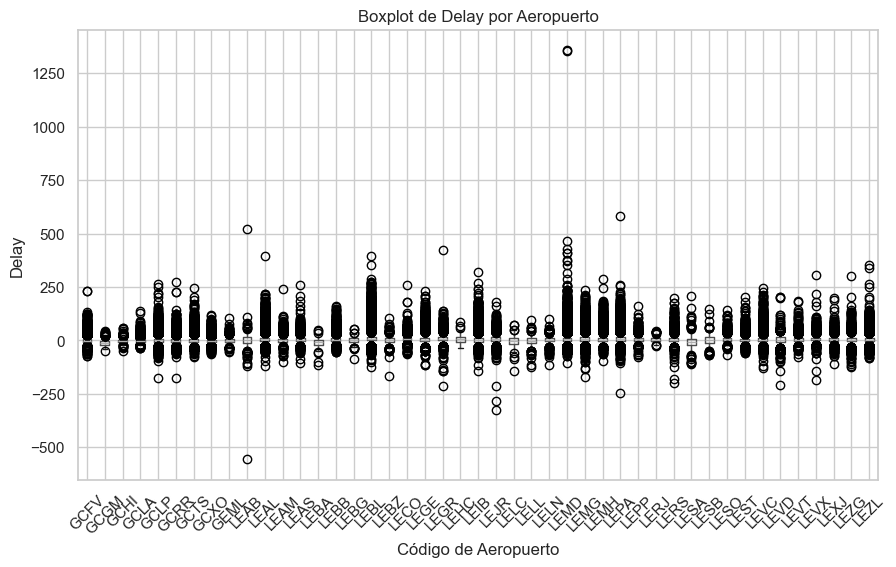

<Figure size 2000x1000 with 0 Axes>

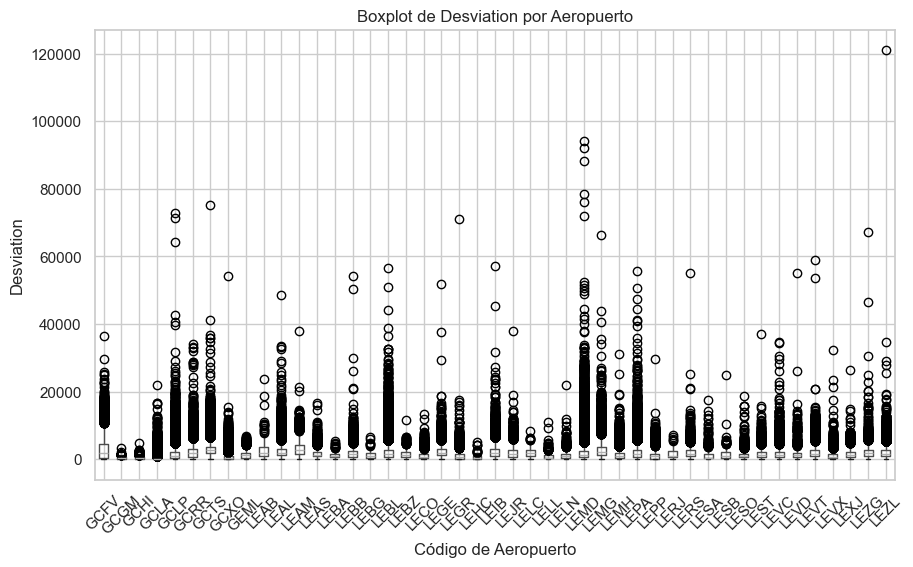

In [28]:
def print_boxplot(df):
    plt.figure(figsize=(20, 10))
    df.boxplot(column='delay', by='airportCode')
    plt.title('Boxplot de Delay por Aeropuerto')
    plt.suptitle('')
    plt.xlabel('Código de Aeropuerto')
    plt.ylabel('Delay')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Boxplot para DESVIATION por airportCode
    plt.figure(figsize=(20, 10))
    df.boxplot(column='deviation', by='airportCode')
    plt.title('Boxplot de Desviation por Aeropuerto')
    plt.suptitle('')
    plt.xlabel('Código de Aeropuerto')
    plt.ylabel('Desviation')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

df_combined = pd.concat([df_departures, df_arrivals], ignore_index=True)
print_boxplot(df_combined) 